# Analyzing the WaterLLMarks results

In [225]:
import pandas as pd

pd.options.mode.copy_on_write = True
renames = {
    "bleu_score": "BLEU",
    "rouge_score": "ROUGE-L",
    "meta_meteor_score": "METEOR",
    "non_llm_string_similarity": "Levenshtein Distance",
    "semantic_similarity": "Semantic Similarity",
    "factual_correctness": "Factual Correctness",
    "llm_context_precision_without_reference": "Context Precision",
    "context_recall": "Context Recall",
    "faithfulness": "Faithfulness",
    "context_overlap": "Context Overlap",
    "retrieved_context_similarity": "Context Similarity",
}

## Reduced set


In [226]:
SETTINGS = {
    "seed": 1138,  # seed on which the experiment was run
    "n": 100,  # number of samples
    "dataset": "llm-papers",  # dataset name
    "model": "mistralai/Mistral-7B-Instruct-v0.3",
    "embedding": "intfloat/e5-mistral-7b-instruct",
}

### Evaluating the baseline

In [227]:
RESULTS_FILE = f"results/{SETTINGS['seed']}_baseline_results_noempty.pkl"


In [228]:
from waterllmarks.evaluation import WLLMKResult

results = WLLMKResult.load(RESULTS_FILE)


In [229]:
df = results.details.drop(
    columns=[
        "user_input",
        "retrieved_contexts",
        "reference_contexts",
        "response",
        "reference",
    ]
).rename(columns=renames)


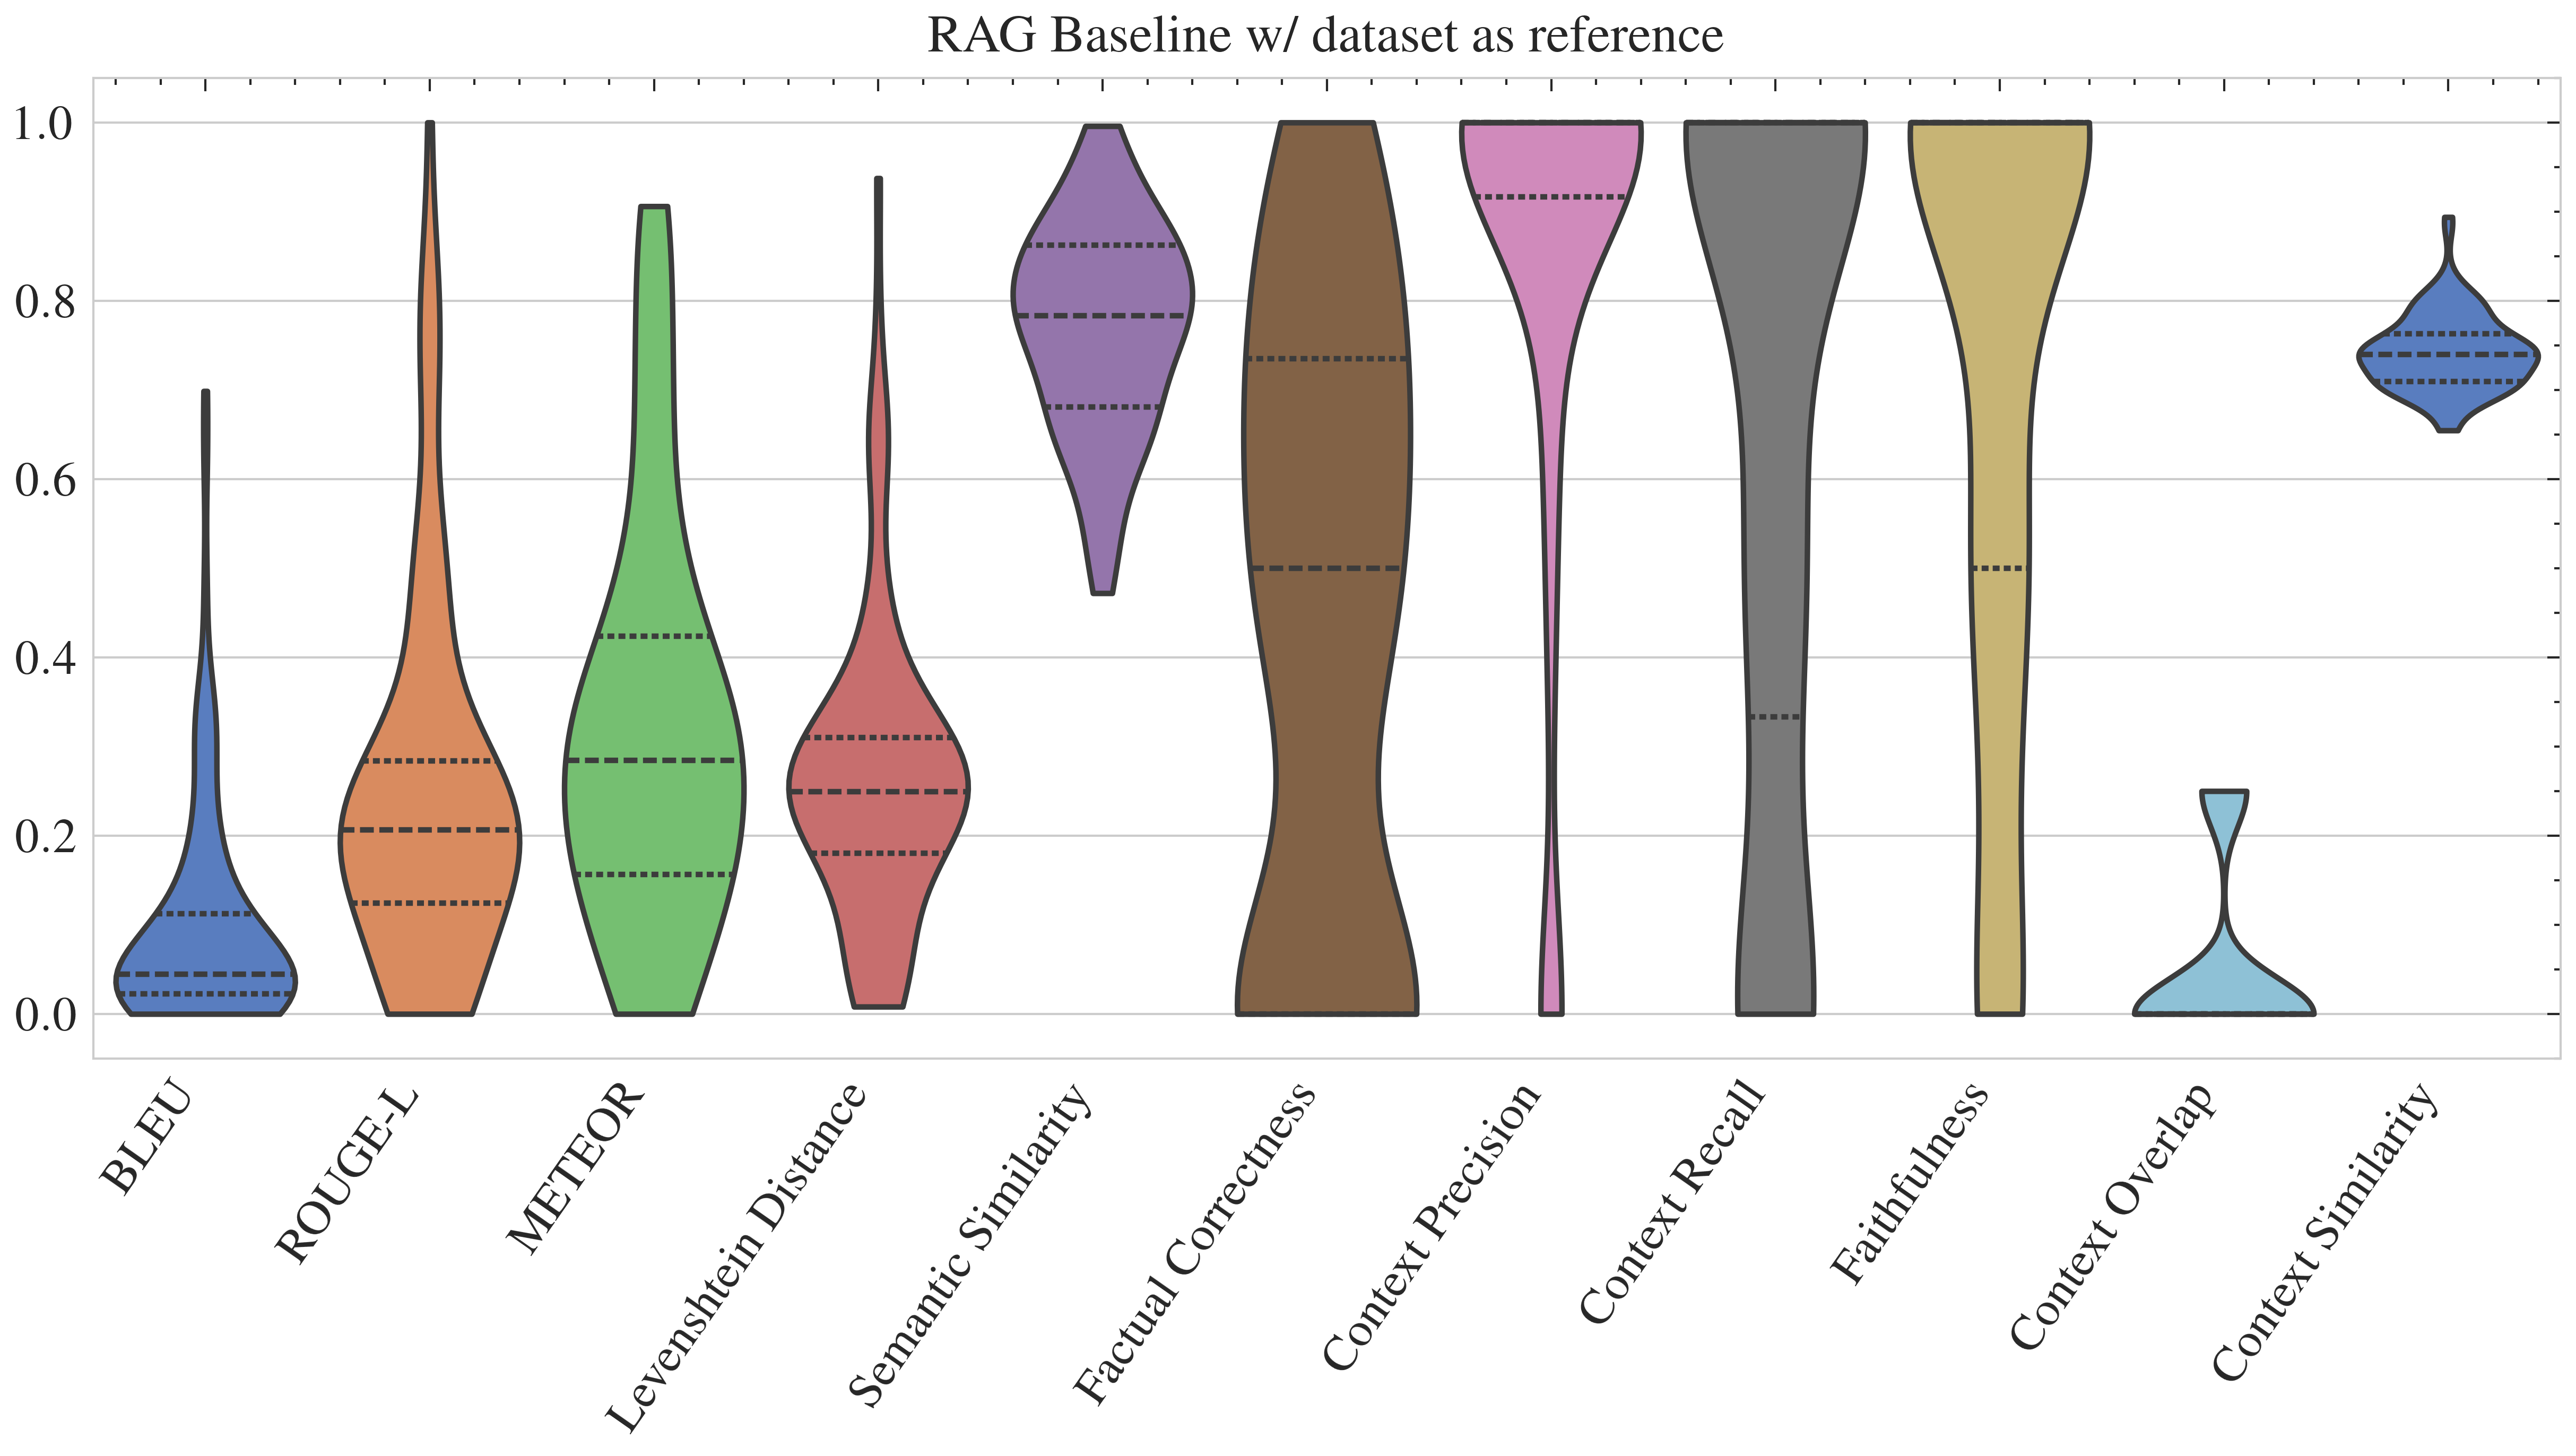

In [230]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
with plt.style.context(["science", "ieee"]):
    plt.figure(figsize=(10, 4))
    sns.violinplot(data=df, cut=0, density_norm="count", palette="muted", inner="quart")
    plt.xticks(rotation=55, ha="right")
    plt.title("RAG Baseline w/ dataset as reference")
    plt.show()

### Watermarks

In [231]:
RESULTS_FILE = f"results/{SETTINGS['seed']}_wllmk_results.pkl"
results = WLLMKResult.load(RESULTS_FILE)

In [232]:
import pandas as pd

df = pd.DataFrame()
for k, v in results.details.items():
    tdf = v.drop(
        columns=[
            "user_input",
            "retrieved_contexts",
            "reference_contexts",
            "response",
            "reference",
        ]
    )
    tdf["qidx"] = tdf.index
    tdf["exp"] = k
    df = pd.concat([df, tdf], ignore_index=True).rename(columns=renames)

df


BLEU   ROUGE-L    METEOR Levenshtein Distance  Semantic Similarity  \
0    0.511566  0.434109  0.449567             0.364224             0.849104   
1    0.316789  0.236842  0.285561             0.274090             0.776747   
2    0.866398  0.894737  0.946719             0.960317             0.934509   
3    0.308520  0.202532  0.129876             0.224467             0.895808   
4    0.313245  0.262626  0.236809             0.337143             0.795604   
..        ...       ...       ...                  ...                  ...   
195       NaN       NaN       NaN                  NaN                  NaN   
196       NaN       NaN       NaN                  NaN                  NaN   
197       NaN       NaN       NaN                  NaN                  NaN   
198       NaN       NaN       NaN                  NaN                  NaN   
199       NaN       NaN       NaN                  NaN                  NaN   

     Factual Correctness  Context Precision  Context Recall  Faithfulness  \
0                   0.67                1.0        0.750000      0.333333   
1                   0.29                0.0        1.000000      0.000000   
2                   0.75                1.0        1.000000      1.000000   
3                   0.50                1.0        0.857143      0.833333   
4                   0.29                1.0        0.500000      0.750000   
..                   ...                ...             ...           ...   
195                  NaN                NaN             NaN           NaN   
196                  NaN                NaN             NaN           NaN   
197                  NaN                NaN             NaN           NaN   
198                  NaN                NaN             NaN           NaN   
199                  NaN                NaN             NaN           NaN   

     Context Overlap  ...   ROUGE-L    METEOR Levenshtein Distance  \
0           0.142857  ...       NaN       NaN                  NaN   
1           0.142857  ...       NaN       NaN                  NaN   
2           0.600000  ...       NaN       NaN                  NaN   
3           0.142857  ...       NaN       NaN                  NaN   
4           0.000000  ...       NaN       NaN                  NaN   
..               ...  ...       ...       ...                  ...   
195              NaN  ...  0.488889  0.495595             0.533333   
196              NaN  ...  0.782609  0.820304             0.756757   
197              NaN  ...  0.396825  0.280436             0.407173   
198              NaN  ...  0.158568  0.103639             0.190498   
199              NaN  ...  0.262295  0.354730             0.274510   

     Semantic Similarity  Factual Correctness  Context Precision  \
0                    NaN                  NaN                NaN   
1                    NaN                  NaN                NaN   
2                    NaN                  NaN                NaN   
3                    NaN                  NaN                NaN   
4                    NaN                  NaN                NaN   
..                   ...                  ...                ...   
195             0.903674                 0.00               1.00   
196             0.969085                 1.00               1.00   
197             0.854652                 0.00                NaN   
198             0.860467                 0.00               1.00   
199             0.815183                 0.57               0.25   

     Context Recall  Faithfulness  Context Overlap  Context Similarity  
0               NaN           NaN              NaN                 NaN  
1               NaN           NaN              NaN                 NaN  
2               NaN           NaN              NaN                 NaN  
3               NaN           NaN              NaN                 NaN  
4               NaN           NaN              NaN                 NaN  
..              ...           ...      

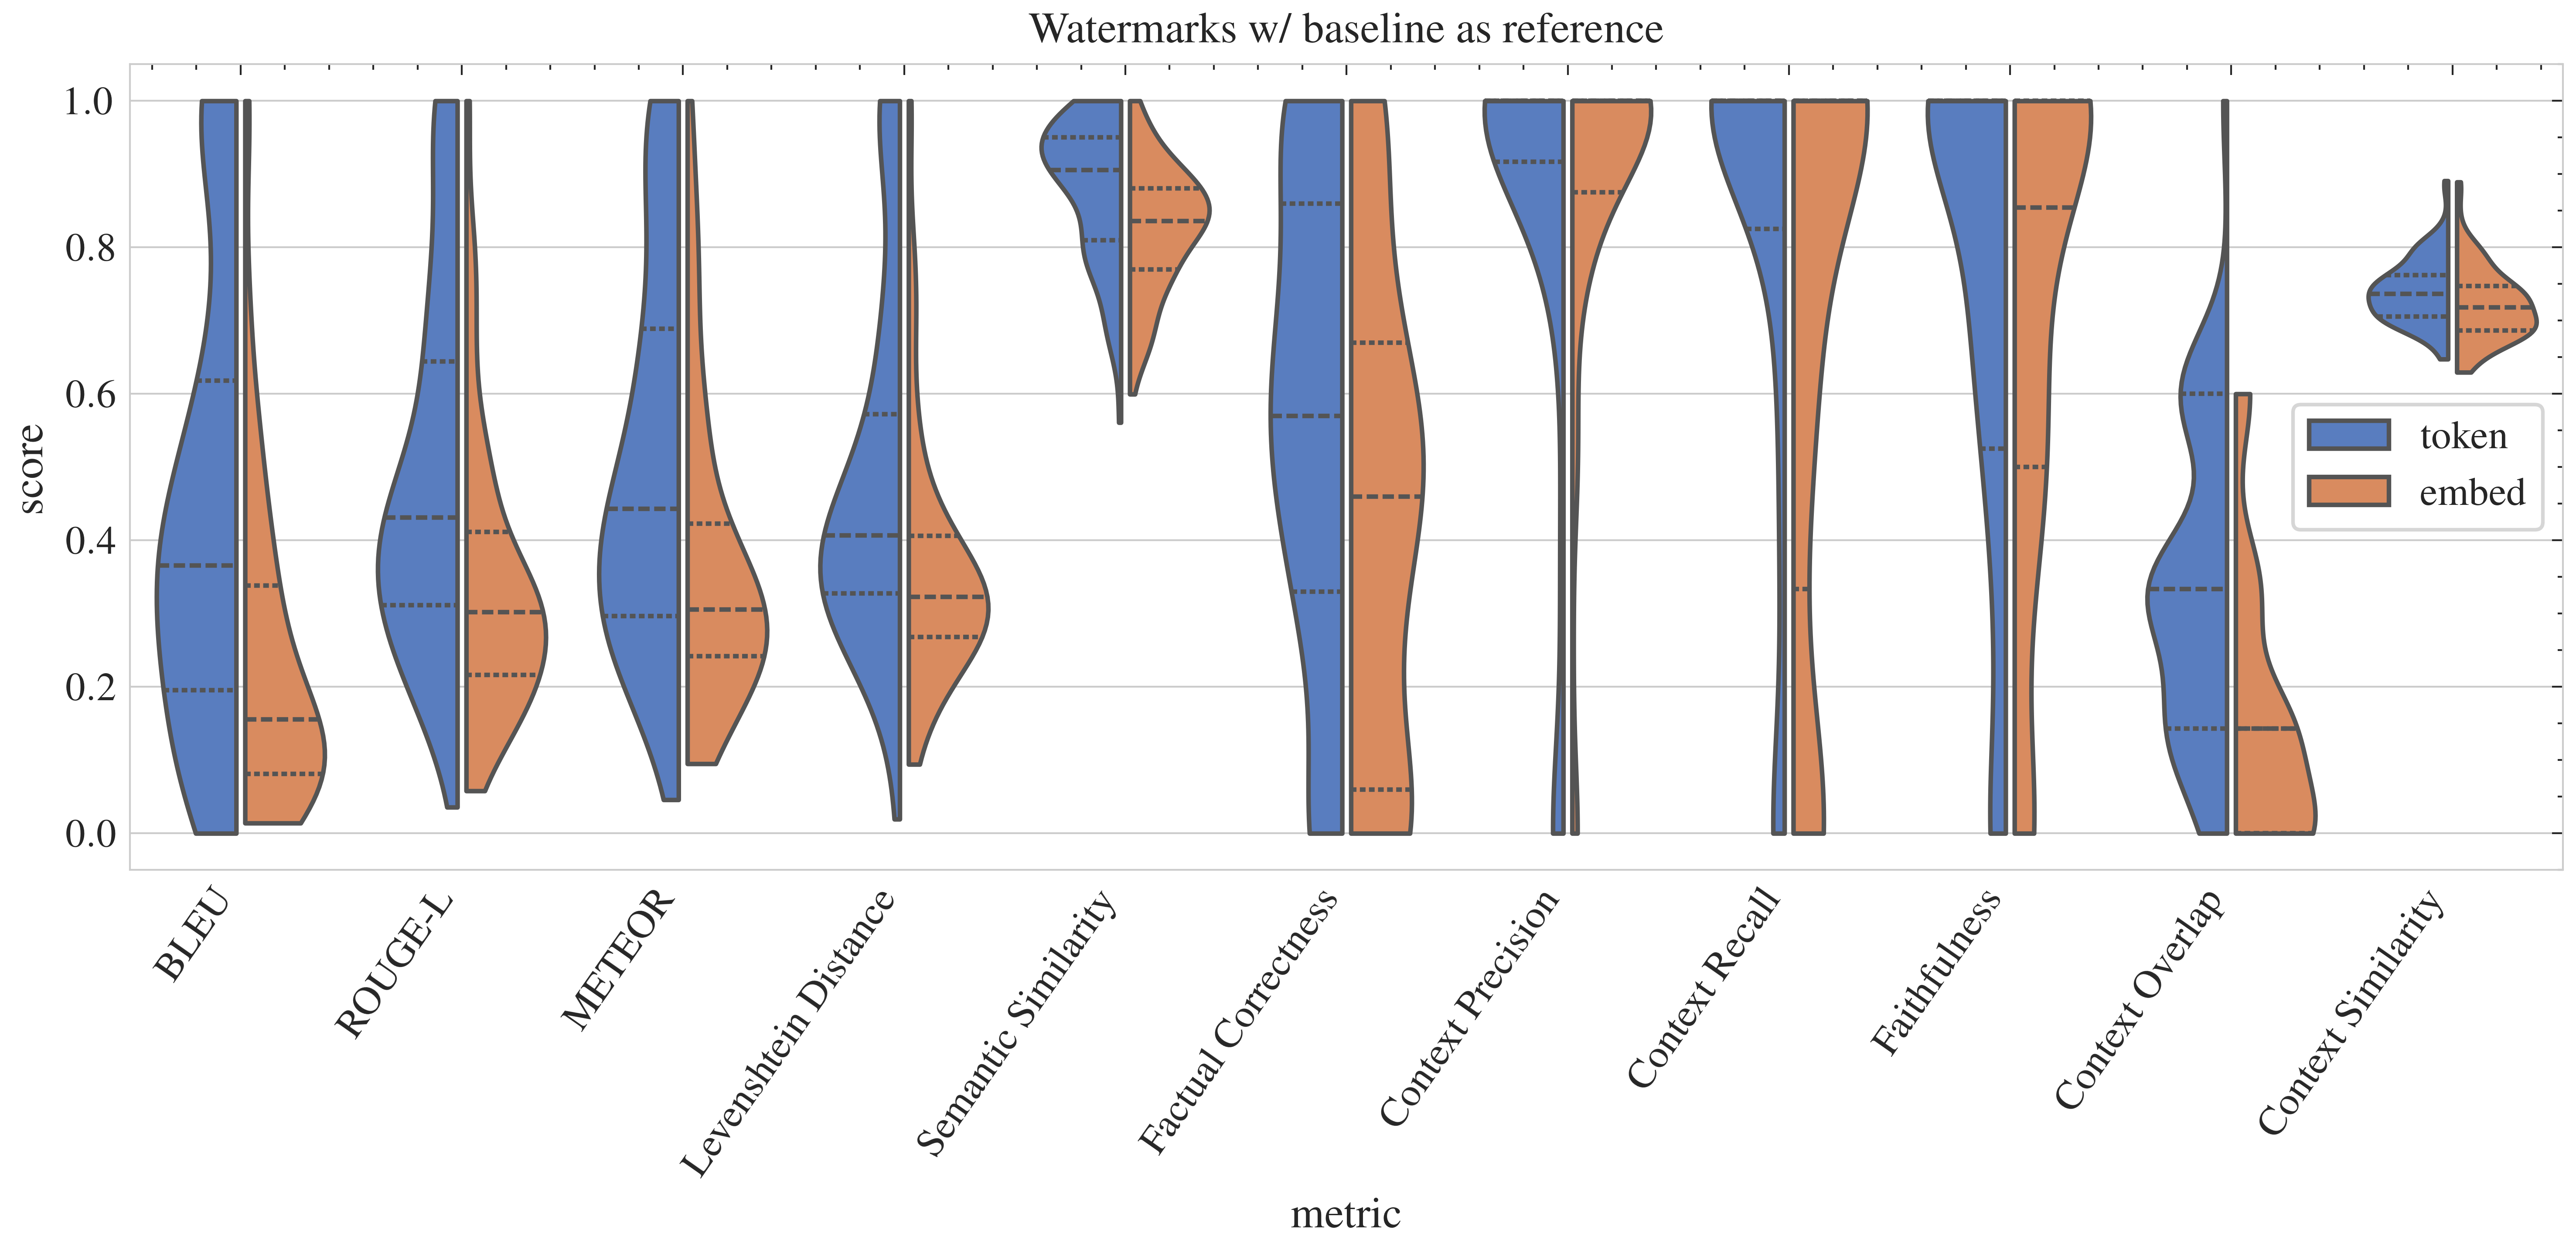

In [233]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
data = df.melt(id_vars=["exp", "qidx"], var_name="metric", value_name="score")
with plt.style.context(["science", "ieee"]):
    plt.figure(figsize=(12, 4))
    sns.violinplot(
        data=data,
        x="metric",
        y="score",
        split=True,
        hue="exp",
        cut=0,
        gap=0.1,
        inner="quartile",
        density_norm="count",
        palette="muted",
    )
    plt.legend(
        frameon=True,
    )
    plt.xticks(rotation=55, ha="right")
    plt.title("Watermarks w/ baseline as reference")
    plt.show()

## Full set

In [234]:
SETTINGS = {
    "seed": 1977,  # seed on which the experiment was run
    "n": 100,  # number of samples
    "dataset": "llm-papers",  # dataset name
    "model": "mistralai/Mistral-7B-Instruct-v0.3",
    "embedding": "intfloat/e5-mistral-7b-instruct",
}

### Evaluating the baseline

In [235]:
RESULTS_FILE = f"results/{SETTINGS['seed']}_baseline_results_noempty.pkl"


In [236]:
from waterllmarks.evaluation import WLLMKResult

results = WLLMKResult.load(RESULTS_FILE)


In [237]:
df = results.details.drop(
    columns=[
        "user_input",
        "retrieved_contexts",
        "reference_contexts",
        "response",
        "reference",
    ]
).rename(columns=renames)
df

BLEU   ROUGE-L    METEOR  Levenshtein Distance  Semantic Similarity  \
0    0.000000  0.000000  0.000000              0.005333             0.360378   
1    0.061039  0.215054  0.287652              0.296512             0.854214   
2    0.621972  0.780488  0.781257              0.775194             0.951430   
3    0.016339  0.031250  0.106762              0.220207             0.638468   
4    0.343893  0.700000  0.747174              0.650794             0.895121   
..        ...       ...       ...                   ...                  ...   
515  0.106828  0.313725  0.304918              0.266234             0.734897   
516  0.349360  0.524272  0.784147              0.380478             0.843658   
517  0.063948  0.096774  0.223423              0.139423             0.721027   
518  0.104836  0.195804  0.270740              0.242300             0.746749   
519  0.331504  0.265306  0.530887              0.302885             0.845423   

     Factual Correctness  Context Precision  Context Recall  Faithfulness  \
0                   0.00           1.000000            1.00      0.666667   
1                   0.00           1.000000            0.25      0.750000   
2                   0.75           1.000000            1.00      1.000000   
3                   0.76           1.000000            0.00      0.875000   
4                   0.00           0.638889            1.00      0.000000   
..                   ...                ...             ...           ...   
515                 0.00           0.833333            1.00      1.000000   
516                 0.67           0.916667            1.00      0.666667   
517                 0.00           1.000000            0.00      0.500000   
518                  NaN           1.000000            1.00      0.800000   
519                 0.73           1.000000            0.50      0.800000   

     Context Overlap  Context Similarity  
0               0.00            0.657919  
1               0.00            0.735624  
2               0.00            0.788591  
3               0.00            0.779695  
4               0.00            0.709596  
..               ...                 ...  
515             0.25            0.783715  
516             0.25            0.694552  
517             0.00            0.672231  
518             0.00            0.698198  
519             0.00            0.712085  

[520 rows x 11 columns]

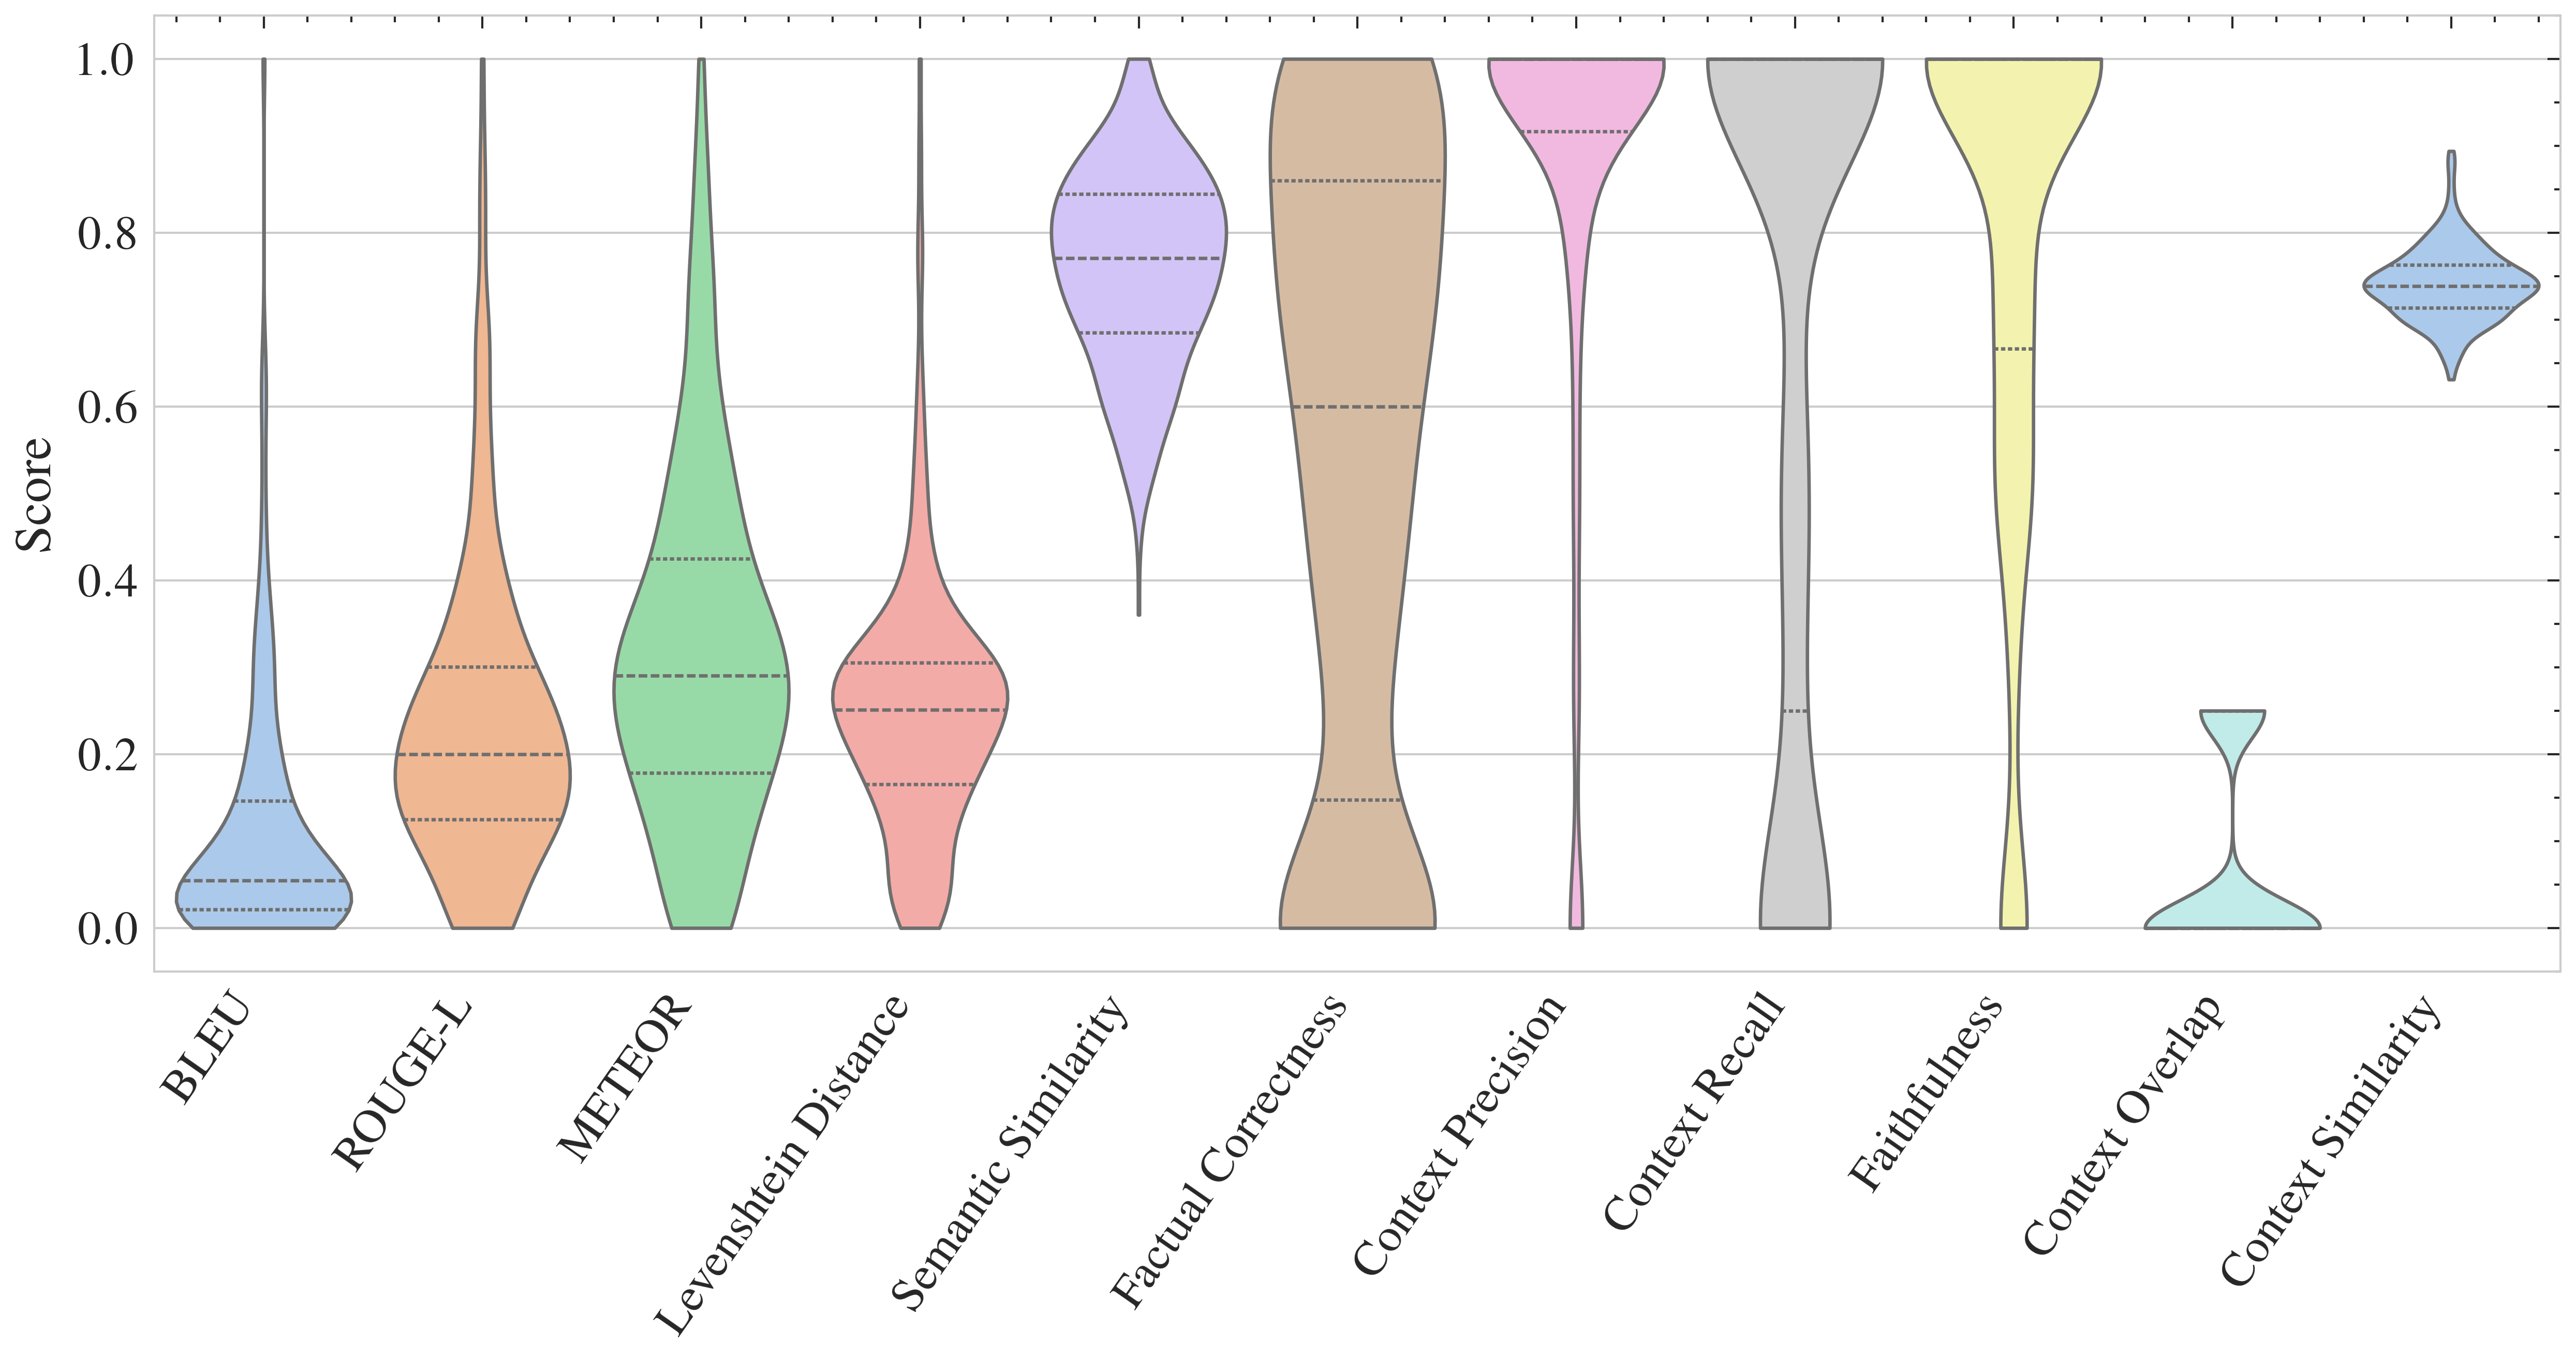

In [238]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
with plt.style.context(["science", "ieee"]):
    plt.figure(figsize=(10, 4))
    sns.violinplot(
        data=df,
        cut=0,
        density_norm="count",
        palette="pastel",
        inner="quart",
        linewidth=0.8,
    )
    plt.xticks(rotation=55, ha="right")
    plt.title("")
    plt.xlabel("")
    plt.ylabel("Score")
    plt.show()

### Watermarks

In [239]:
RESULTS_FILE = f"results/{SETTINGS['seed']}_wllmk_results.pkl"
results = WLLMKResult.load(RESULTS_FILE)

In [240]:
import pandas as pd

df = pd.DataFrame()
for k, v in results.details.items():
    tdf = v.drop(
        columns=[
            "user_input",
            "retrieved_contexts",
            "reference_contexts",
            "response",
            "reference",
        ]
    )
    tdf["qidx"] = tdf.index
    tdf["exp"] = k
    df = pd.concat([df, tdf], ignore_index=True)

df = df.rename(columns=renames)
df


BLEU   ROUGE-L    METEOR  Levenshtein Distance  Semantic Similarity  \
0     1.000000  0.629630  0.402000              0.521839             0.911981   
1     0.111244  0.291667  0.400370              0.264605             0.759346   
2     0.866398  0.894737  0.946719              0.960317             0.934570   
3     0.320054  0.312500  0.233638              0.346614             0.888850   
4     0.450984  0.285714  0.284944              0.410526             0.858720   
...        ...       ...       ...                   ...                  ...   
1033  0.123750  0.225352  0.234781              0.360092             0.790045   
1034  0.251962  0.238095  0.204201              0.319728             0.782727   
1035  0.001395  0.105727  0.089606              0.113699             0.555043   
1036  0.156127  0.269231  0.227370              0.306785             0.701592   
1037  0.533682  0.450000  0.505449              0.415217             0.897712   

      Factual Correctness  Context Precision  Context Recall  Faithfulness  \
0                    1.00           0.000000        0.000000          0.00   
1                    0.40           0.000000        1.000000          0.00   
2                    0.75           1.000000        1.000000          1.00   
3                    0.00           1.000000        0.000000          0.60   
4                    0.73           0.833333        0.333333          0.80   
...                   ...                ...             ...           ...   
1033                 0.00           1.000000        1.000000          1.00   
1034                 0.00           1.000000        1.000000          1.00   
1035                 0.00           1.000000        1.000000          0.00   
1036                 0.33           0.805556        1.000000          0.25   
1037                 0.73           1.000000        0.666667          0.60   

      Context Overlap  Context Similarity  qidx    exp  
0            0.142857            0.650391     0  token  
1            0.142857            0.716654     1  token  
2            0.600000            0.787445     2  token  
3            0.142857            0.769618     3  token  
4            0.000000            0.698362     4  token  
...               ...                 ...   ...    ...  
1033         0.142857            0.742482   514  embed  
1034         0.142857            0.685316   515  embed  
1035         0.000000            0.652024   516  embed  
1036         0.142857            0.686033   517  embed  
1037         0.333333            0.709701   518  embed  

[1038 rows x 13 columns]

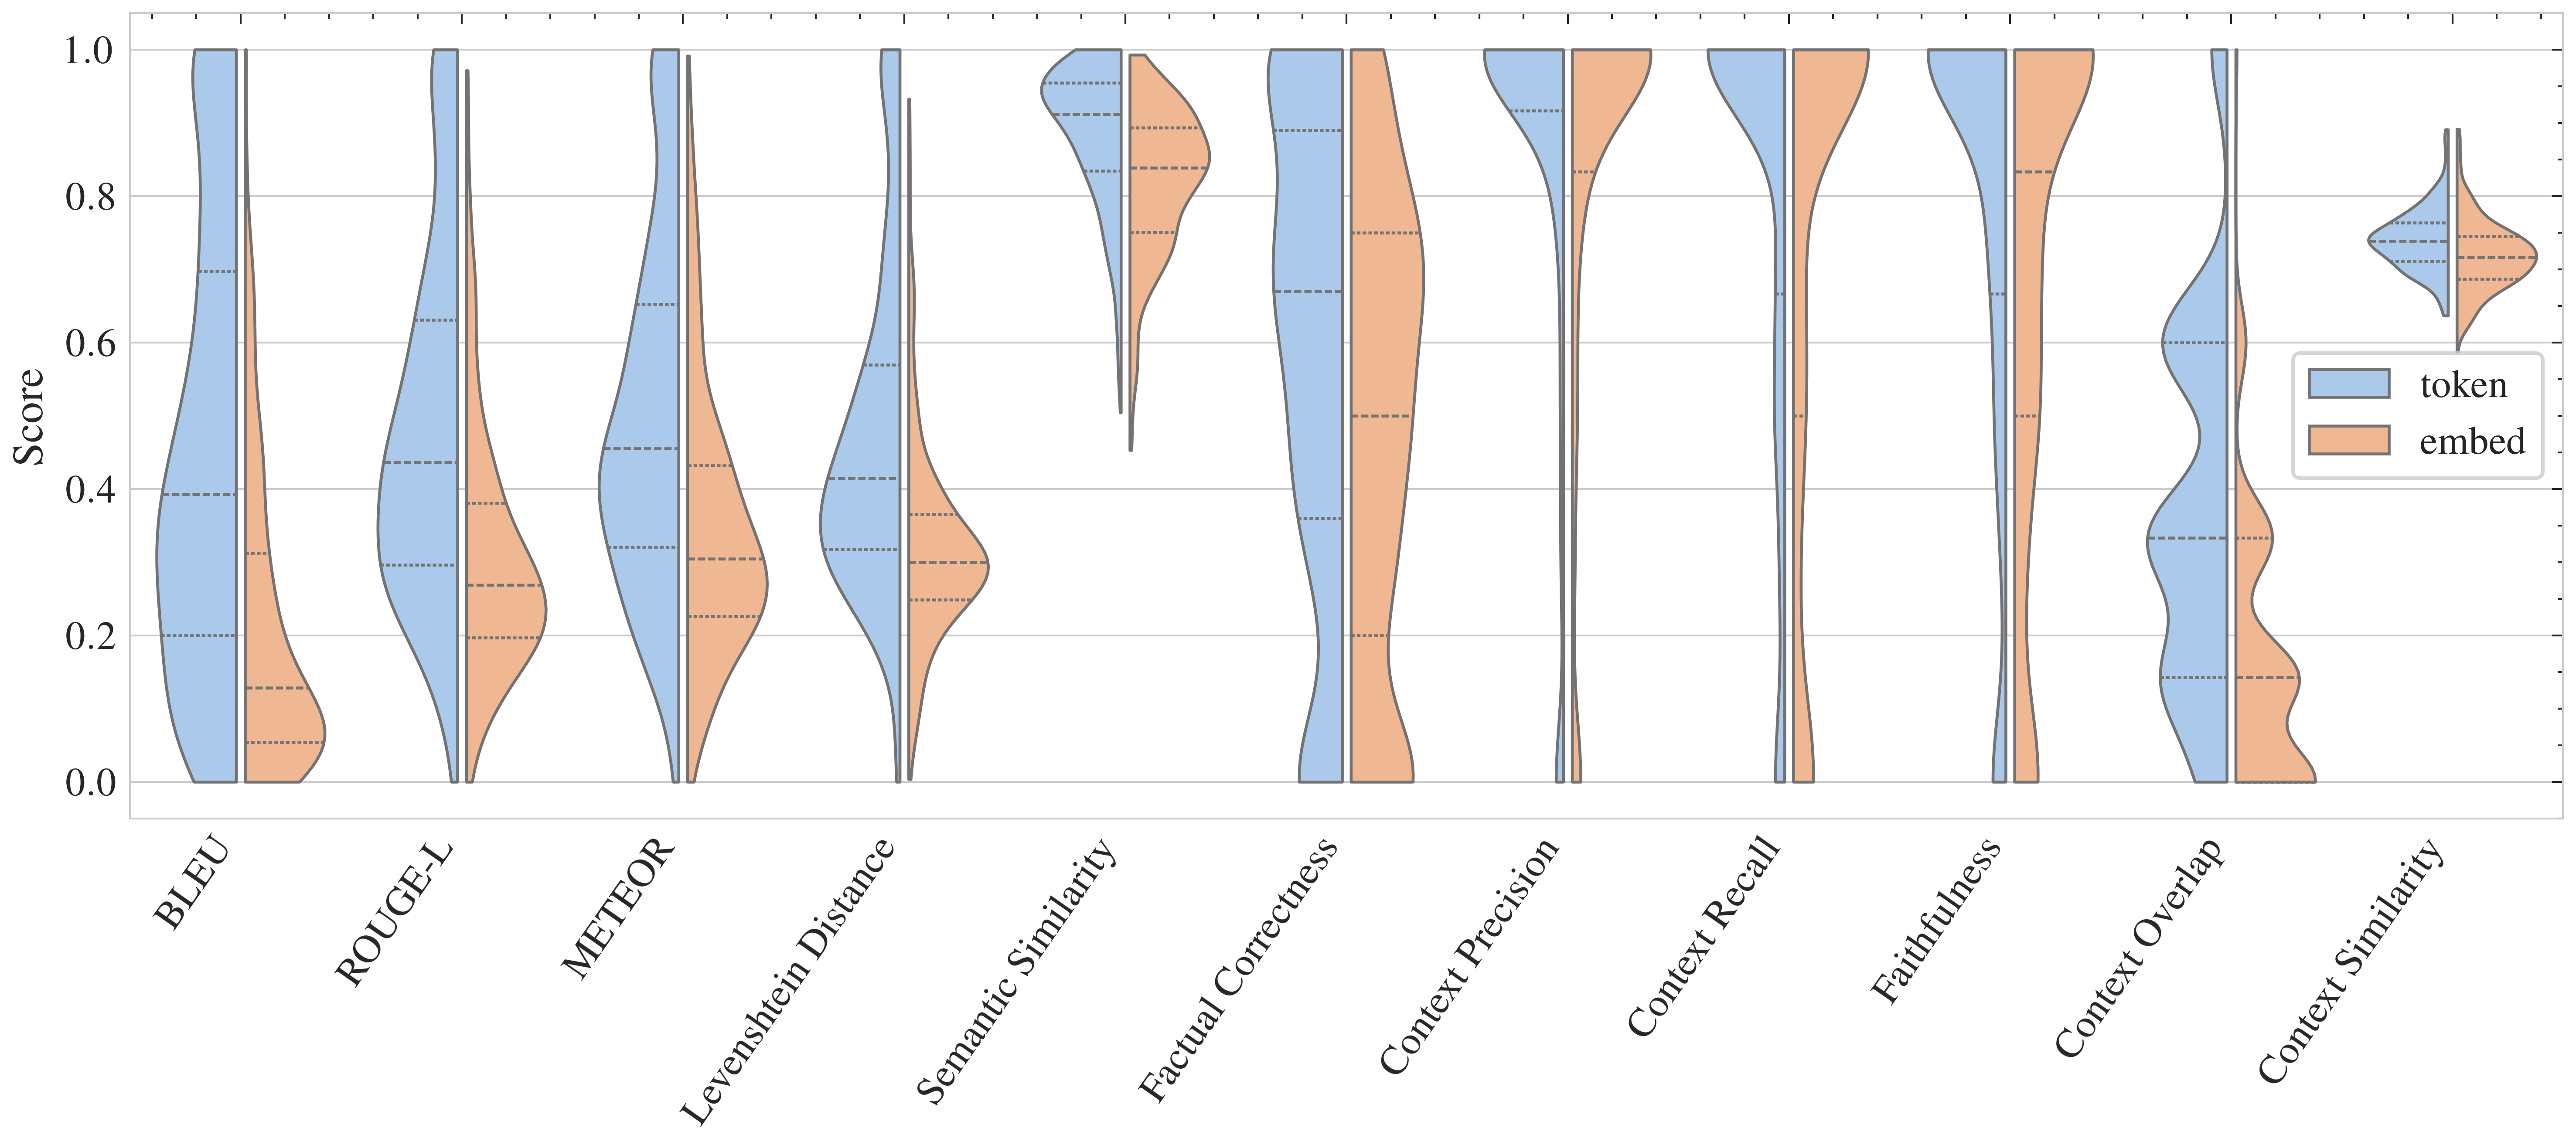

In [241]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
data = df.melt(id_vars=["exp", "qidx"], var_name="metric", value_name="score")
with plt.style.context(["science", "ieee"]):
    plt.figure(figsize=(12, 4))
    sns.violinplot(
        data=data,
        x="metric",
        y="score",
        split=True,
        hue="exp",
        cut=0,
        gap=0.1,
        inner="quartile",
        density_norm="count",
        palette="pastel",
        linewidth=0.8,
    )
    plt.legend(
        frameon=True,
    )
    plt.xticks(rotation=55, ha="right")
    plt.title("")
    plt.xlabel("")
    plt.ylabel("Score")
    plt.show()

### Augmented prompts vs. original

In [242]:
RESULTS_FILE = f"results/{SETTINGS['seed']}_augmented_results.pkl"
results = WLLMKResult.load(RESULTS_FILE)

In [243]:
import pandas as pd

df = pd.DataFrame()
for k, v in results.details.items():
    tdf = v.drop(
        columns=[
            "user_input",
            "retrieved_contexts",
            "reference_contexts",
            "response",
            "reference",
        ]
    )
    tdf["qidx"] = tdf.index
    tdf["exp"] = k
    df = pd.concat([df, tdf], ignore_index=True)

df = df.rename(columns=renames)
df


BLEU   ROUGE-L    METEOR  Levenshtein Distance  Semantic Similarity  \
0    0.000000  0.000000  0.000000              0.005333             0.360378   
1    0.621972  0.780488  0.781257              0.775194             0.951430   
2    0.343893  0.700000  0.747174              0.650794             0.895121   
3    0.019853  0.150000  0.147059              0.189286             0.729099   
4    0.024427  0.148148  0.311423              0.219081             0.828988   
..        ...       ...       ...                   ...                  ...   
709  0.032342  0.102190  0.134875              0.247649             0.593588   
710  0.002636  0.056338  0.042735              0.196581             0.553615   
711  0.000000  0.042553  0.060606              0.232198             0.562109   
712  0.015394  0.142857  0.179104              0.205556             0.579088   
713  0.008518  0.141176  0.129683              0.263975             0.624573   

     Factual Correctness  Context Precision  Context Recall  Faithfulness  \
0                   0.00           1.000000             1.0      0.666667   
1                   0.75           1.000000             1.0      1.000000   
2                   0.00           0.638889             1.0      0.000000   
3                   0.00           1.000000             1.0      0.800000   
4                    NaN           1.000000             1.0      1.000000   
..                   ...                ...             ...           ...   
709                 0.40           1.000000             0.0      0.428571   
710                 0.00           0.750000             0.0      0.000000   
711                 0.00           0.916667             0.0      0.000000   
712                 0.86           0.805556             0.0      1.000000   
713                 0.00                NaN             0.0      0.250000   

     Context Overlap  Context Similarity  qidx        exp  
0                0.0            0.657919     0   baseline  
1                0.0            0.788591     2   baseline  
2                0.0            0.709596     4   baseline  
3                0.0            0.685867     5   baseline  
4                0.0            0.717082     7   baseline  
..               ...                 ...   ...        ...  
709              0.0            0.747547   352  augmented  
710              0.0            0.706815   353  augmented  
711              0.0            0.728312   354  augmented  
712              0.0            0.718475   355  augmented  
713              0.0            0.742126   356  augmented  

[714 rows x 13 columns]

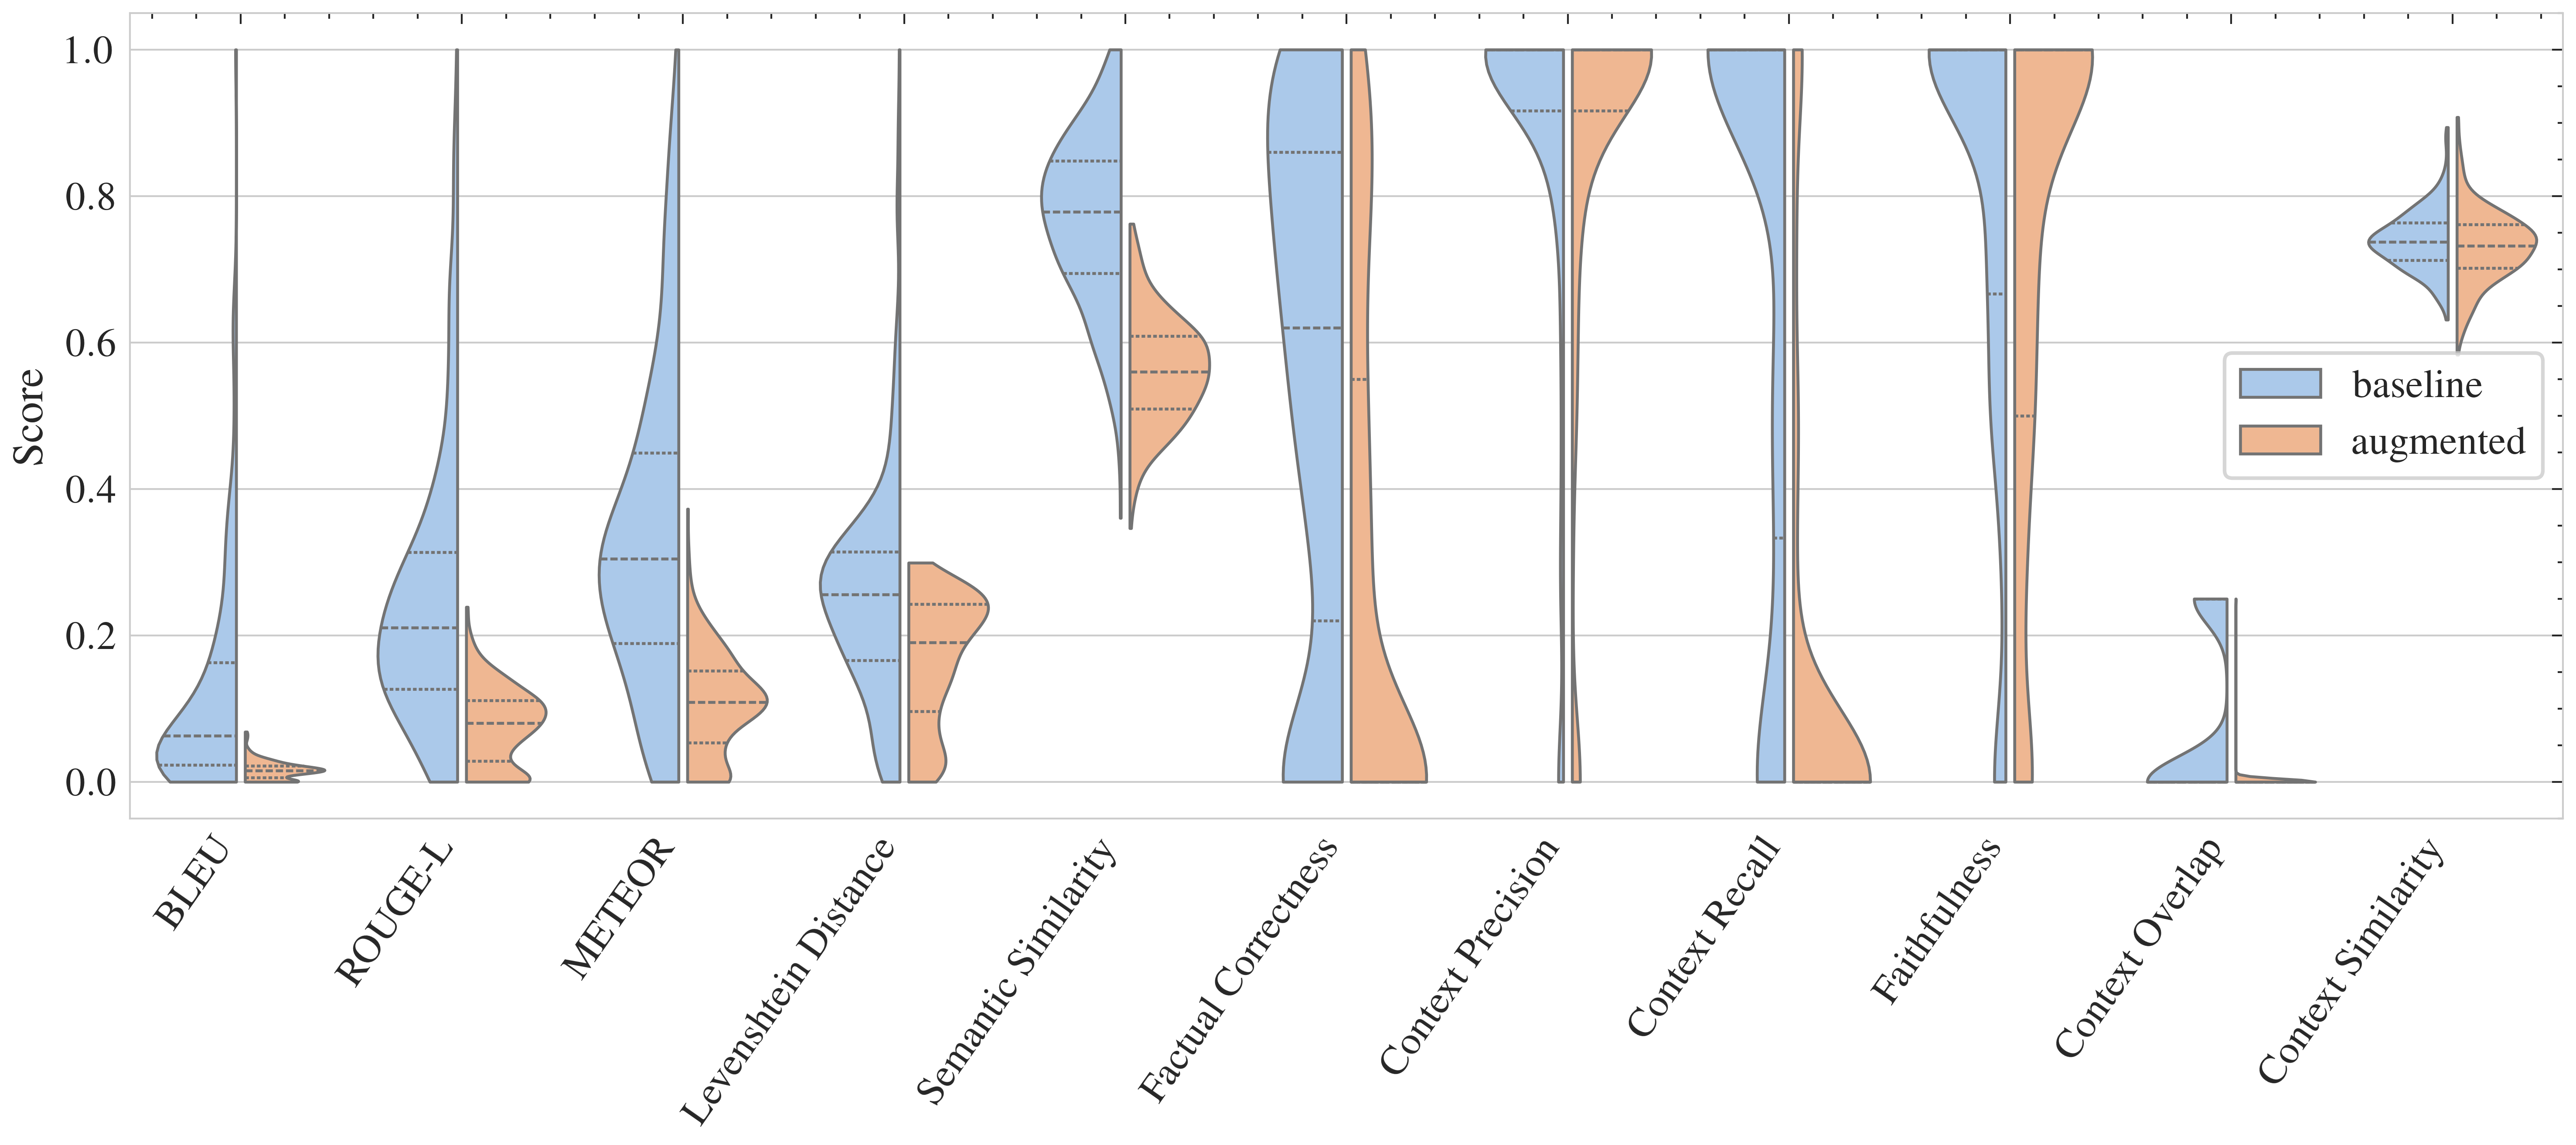

In [244]:
import seaborn as sns
import scienceplots
import matplotlib.pyplot as plt

# sns.set_theme(style="whitegrid")
data = df.melt(id_vars=["exp", "qidx"], var_name="metric", value_name="score")
with plt.style.context(["science", "ieee"]):
    plt.figure(figsize=(12, 4))
    sns.violinplot(
        data=data,
        x="metric",
        y="score",
        split=True,
        hue="exp",
        cut=0,
        gap=0.1,
        inner="quartile",
        density_norm="count",
        palette="pastel",
        linewidth=0.8,
    )
    plt.legend(
        frameon=True,
    )
    plt.xticks(rotation=55, ha="right")
    plt.title("")
    plt.xlabel("")
    plt.ylabel("Score")
    plt.show()